In [ ]:
# Customer Churn Analysis and Prediction

## Objective:
The objective of this project is to analyze customer data, identify patterns that lead to customer churn, and build a machine learning model to predict which customers are likely to leave the company.

## Tools Used:
- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df = pd.read_csv(r"C:\Users\DEEP PC\Desktop\DAta for analysis\WA_Fn-UseC_-Telco-Customer-Churn.csv")


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape


(7043, 21)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Data Understanding

- The dataset contains around 7000 customer records.
- The target variable is **Churn** (Yes/No).
- The dataset contains both numerical and categorical features.


# Exploratory Data Analysis (EDA)


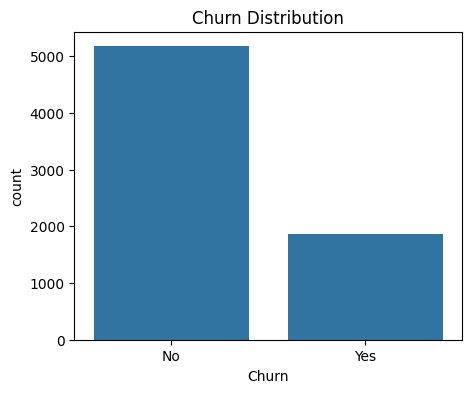

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


## - The dataset is imbalanced: more customers stay than leave.
- This means accuracy alone is not enough; we must also look at precision/recall.


## - Customers with Month-to-Month contracts churn much more than long-term contract customers.


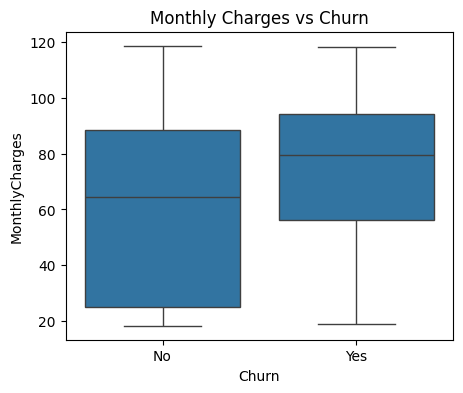

In [11]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


## - Customers with higher monthly charges are more likely to churn.


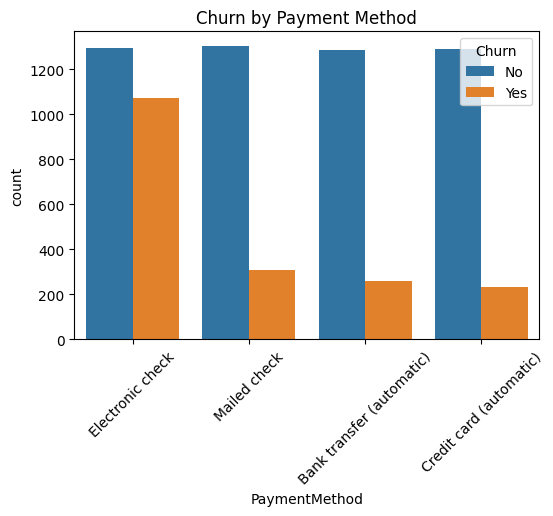

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Churn by Payment Method")
plt.show()


In [13]:
df = df.drop('customerID', axis=1)


In [20]:
!pip install scikit-learn


   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 3.1 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 3.5 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.0 MB 3.7 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/8.0 MB 4.0 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.0 MB 4.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.0 MB 4.4 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/8.0 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 4.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
    -----------------------------------

In [32]:
df = pd.read_csv(r"C:\Users\DEEP PC\Desktop\DAta for analysis\WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)


(7043, 21)


In [33]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna()


In [34]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [35]:
df = pd.get_dummies(df, drop_first=True)


In [36]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [37]:
df = df.dropna(subset=['Churn'])


In [38]:
df['Churn'].isnull().sum()


np.int64(0)

In [39]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [41]:
y.isnull().sum()


np.int64(0)

In [42]:
print(df.shape)
print(X.shape)
print(y.shape)


(7032, 7062)
(7032, 7061)
(7032,)


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.7796730632551528
              precision    recall  f1-score   support

           0       0.79      0.95      0.86      1033
           1       0.70      0.30      0.42       374

    accuracy                           0.78      1407
   macro avg       0.74      0.63      0.64      1407
weighted avg       0.77      0.78      0.75      1407



In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


In [47]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7953091684434968
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.66      0.47      0.55       374

    accuracy                           0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.78      1407



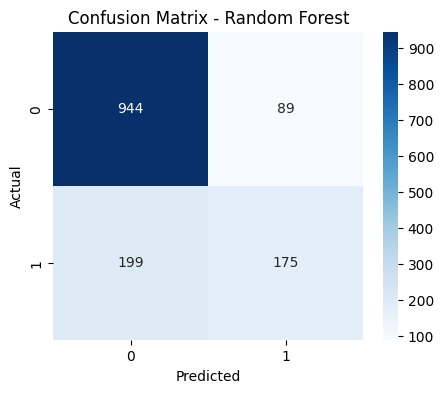

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [49]:
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp.head(10)


,Feature,Importance
3,TotalCharges,0.101946
1,tenure,0.095377
2,MonthlyCharges,0.081450
7041,InternetService_Fiber optic,0.028538
7059,PaymentMethod_Electronic check,0.024252
7056,Contract_Two year,0.024187
7044,OnlineSecurity_Yes,0.020160
7050,TechSupport_Yes,0.019357
7055,Contract_One year,0.018015
7057,PaperlessBilling_Yes,0.017451


## Conclusion & Business Recommendations

- The model can successfully predict customers likely to churn.
- Important factors affecting churn include contract type, tenure, monthly charges, and internet service.
- Business should:
  - Target month-to-month customers with special offers.
  - Give loyalty discounts to long-tenure customers.
  - Review pricing for high monthly charge customers.
